<a href="https://colab.research.google.com/github/LaylaGrisell/CourseraDevelopingDataProducts/blob/main/Copia_de_Dia_1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing Template

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


## Importing the dataset

In [ ]:
dataset = pd.read_csv('Data_Day_1.csv')
print(dataset)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


###  As funtion of the Country, Age, Salary we want to study the Purchased  variable 


In [ ]:
##### Extracting the features and target in two different matrix 
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [ ]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [ ]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


In [ ]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


### Taking care of missing data

In [ ]:
# Below are a quick example
# Drop all rows with NaN values
df2 = dataset.dropna()
print(df2)
print('##########################################')
df2 = dataset.dropna(axis=0) # axis = 0 is refering to the rows, axis = 1 to columns
print(df2)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes
##########################################
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
# Reset index after drop
df2 = dataset.dropna().reset_index(drop=True)
print(df2)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4   France  35.0  58000.0       Yes
5   France  48.0  79000.0       Yes
6  Germany  50.0  83000.0        No
7   France  37.0  67000.0       Yes


In [ ]:
# Drop row that has all NaN values
df2 = dataset.dropna(how='all')
print(df2)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes
5   France  35.0  58000.0       Yes
6    Spain   NaN  52000.0        No
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
# Drop rows that has NaN values on selected columns
df2 = dataset.dropna(subset=['Age','Salary'])
print(df2)

   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
5   France  35.0  58000.0       Yes
7   France  48.0  79000.0       Yes
8  Germany  50.0  83000.0        No
9   France  37.0  67000.0       Yes


In [ ]:
dataset.to_numpy()

array([['France', 44.0, 72000.0, 'No'],
       ['Spain', 27.0, 48000.0, 'Yes'],
       ['Germany', 30.0, 54000.0, 'No'],
       ['Spain', 38.0, 61000.0, 'No'],
       ['Germany', 40.0, nan, 'Yes'],
       ['France', 35.0, 58000.0, 'Yes'],
       ['Spain', nan, 52000.0, 'No'],
       ['France', 48.0, 79000.0, 'Yes'],
       ['Germany', 50.0, 83000.0, 'No'],
       ['France', 37.0, 67000.0, 'Yes']], dtype=object)

### Impute a value to the NaN cells

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') # ['mean', 'median', 'most_frequent', 'constant']
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


### Some Plots

   Country        Age        Salary Purchased
0   France       44.0       72000.0        No
1    Spain       27.0       48000.0       Yes
2  Germany       30.0       54000.0        No
3    Spain       38.0       61000.0        No
4  Germany       40.0  63777.777778       Yes
5   France       35.0       58000.0       Yes
6    Spain  38.777778       52000.0        No
7   France       48.0       79000.0       Yes
8  Germany       50.0       83000.0        No
9   France       37.0       67000.0       Yes


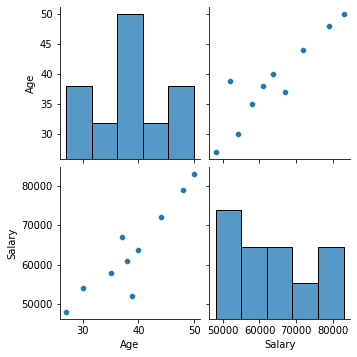

In [ ]:
# Basic correlogram
df = pd.DataFrame()
df['Country'] = X[:,0] 
df['Age'] = X[:,1] 
df['Salary'] = X[:,2] 
df['Purchased'] = y 
print(df)

# without regression
sns.pairplot(df)
plt.show()

# As you can see the correlogram only consider the numeric variables


Text(0, 0.5, 'Frequency')

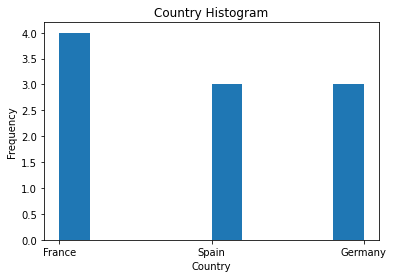

In [ ]:
# Histogram of the countries
fig = plt.Figure()
plt.hist(df['Country'])
plt.title('Country Histogram')
plt.xlabel('Country')
plt.ylabel('Frequency')

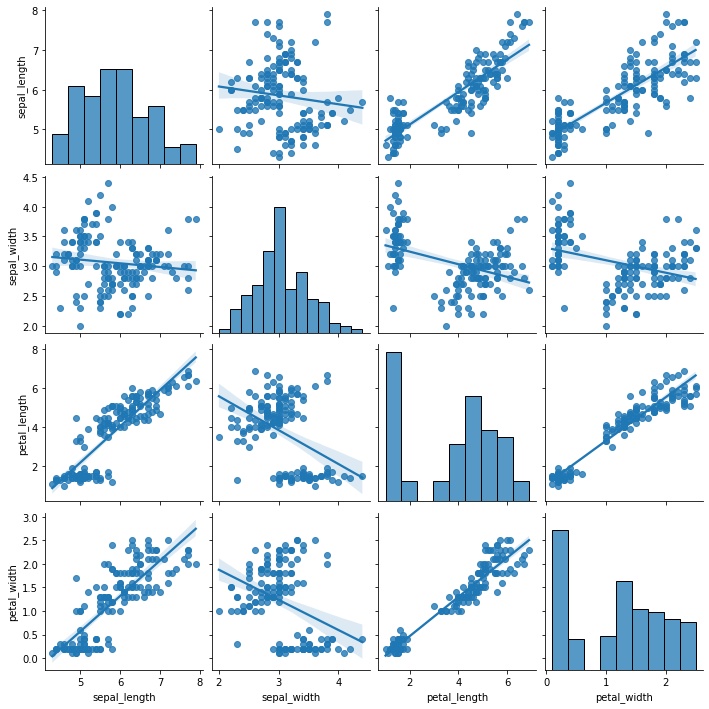

In [ ]:
df = sns.load_dataset('iris')
sns.pairplot(df,kind='reg') 
# with regression
#tips = sns.load_dataset("tips")
# print(tips)
# sns.regplot(x="total_bill", y="tip", data=tips);

 ## Enconding categorical data
    

### Enconding the independent variable

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Enconding the dependent variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


In [ ]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


## Splitting the dataset into the Training set and Test set

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 37.0 67000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [1.0 0.0 0.0 44.0 72000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
[[0.0 1.0 0.0 30.0 54000.0]
 [0.0 1.0 0.0 50.0 83000.0]]
[1 1 1 0 1 0 0 1]
[0 0]


## Feature Scaling  (why? and how?)

In [ ]:
from sklearn.preprocessing import StandardScaler   # recommended in most of ML algortihms
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
X_train

array([[1.0, 0.0, 1.0, -0.7745966692414834, 0.2630675731713538,
        0.1238147854838185],
       [0.0, 1.0, 0.0, -0.7745966692414834, -0.25350147960148617,
        0.4617563176278856],
       [1.0, 0.0, 0.0, 1.2909944487358056, -1.9753983221776195,
        -1.5309334063940294],
       [1.0, 0.0, 0.0, 1.2909944487358056, 0.05261351463427101,
        -1.1114197802841526],
       [0.0, 1.0, 0.0, -0.7745966692414834, 1.6405850472322605,
        1.7202971959575162],
       [1.0, 0.0, 0.0, 1.2909944487358056, -0.08131179534387283,
        -0.16751412153692966],
       [0.0, 1.0, 0.0, -0.7745966692414834, 0.9518263102018072,
        0.9861483502652316],
       [0.0, 1.0, 0.0, -0.7745966692414834, -0.5978808481167128,
        -0.48214934111933727]], dtype=object)

In [ ]:
from sklearn.preprocessing import MinMaxScaler   # recommended when you have normal distribution in most of your features
sc = MinMaxScaler(feature_range = (0, 1))
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
X_train

array([[0.0, 1.0, 0.0, 0.6190476190476191, 0.5089605734767026],
       [1.0, 0.0, 0.0, 0.4761904761904762, 0.6129032258064516],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 1.0, 0.5608465608465609, 0.12903225806451613],
       [1.0, 0.0, 0.0, 1.0, 1.0],
       [0.0, 0.0, 1.0, 0.5238095238095238, 0.41935483870967744],
       [1.0, 0.0, 0.0, 0.8095238095238095, 0.7741935483870968],
       [1.0, 0.0, 0.0, 0.38095238095238093, 0.32258064516129037]],
      dtype=object)